In [1]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px

In [27]:
df = pd.read_csv('wildfires_geo2.csv', parse_dates=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11888 entries, 0 to 11887
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        11888 non-null  int64  
 1   agency      11888 non-null  object 
 2   unit_id     11888 non-null  object 
 3   fire_name   11860 non-null  object 
 4   inc_num     11468 non-null  object 
 5   alarm_date  7973 non-null   object 
 6   cont_date   3137 non-null   object 
 7   cause       11878 non-null  object 
 8   report_ac   3579 non-null   float64
 9   gis_acres   11888 non-null  float64
 10  c_method    3452 non-null   object 
 11  objective   11833 non-null  object 
 12  unit        11888 non-null  object 
 13  lat         11888 non-null  float64
 14  lon         11888 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.4+ MB


In [29]:
df

,year,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,report_ac,gis_acres,c_method,objective,unit,lat,lon
0,1878,Contract County,Los Angeles County,,0,NaN,NaN,14 - Unknown / Unidentified,NaN,59468.8800,NaN,Suppression (Wildfire),Los Angeles County,34.055130,-118.257030
1,1895,Contract County,Los Angeles County,,0,NaN,NaN,14 - Unknown / Unidentified,NaN,628.1136,NaN,Suppression (Wildfire),Los Angeles County,34.055130,-118.257030
2,1896,Contract County,Los Angeles County,,0,NaN,NaN,14 - Unknown / Unidentified,NaN,7531.7170,NaN,Suppression (Wildfire),Los Angeles County,34.055130,-118.257030
3,1898,Contract County,Los Angeles County,,0,NaN,NaN,14 - Unknown / Unidentified,NaN,1660.1030,NaN,Suppression (Wildfire),Los Angeles County,34.055130,-118.257030
4,1898,Contract County,Los Angeles County,,0,NaN,NaN,14 - Unknown / Unidentified,NaN,428.4387,NaN,Suppression (Wildfire),Los Angeles County,34.055130,-118.257030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11883,2014,USDI Fish and Wildlife Service,Bitter Creek National Wildlife Refuge,SCHOOL,NaN,2014-04-30 00:00:00,2014-05-02,9 - Miscellaneous,224.0,223.7797,1 - GPS Ground,Suppression (Wildfire),Bitter Creek National Wildlife Refuge,34.959811,-119.314680
11884,2017,Local Response Area,Los Angeles City FD,SKIRBALL,30179,2017-12-06 00:00:00,2017-12-07,4 - Campfire,422.0,371.3076,8 - Unknown,Suppression (Wildfire),Los Angeles City FD,34.258426,-118.301548
11885,2017,Contract County,Los Angeles City FD,LA TUNA,965,2017-09-01 00:00:00,2017-09-08,14 - Unknown / Unidentified,7194.0,7051.3510,8 - Unknown,Suppression (Wildfire),Los Angeles City FD,34.258426,-118.301548
11886,2017,USDA Forest Service,Rouge River- Siskiyou,ABNEY,568,2017-08-10 00:00:00,2018-01-10,1 - Lightning,NaN,32893.2600,8 - Unknown,Suppression (Wildfire),Rouge River- Siskiyou,42.273370,-83.134370


In [ ]:
df.

In [74]:
grouped = df.groupby(['unit', 'lat', 'lon', 'year']).count()

In [75]:
grouped = grouped.reset_index()

In [76]:
grouped.columns

Index(['unit', 'lat', 'lon', 'year', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'report_ac', 'gis_acres',
       'c_method', 'objective'],
      dtype='object')

In [77]:
grouped = grouped[['unit', 'lat', 'lon', 'year','agency']]

In [78]:
grouped = grouped.rename(columns={'agency':'count'})

In [88]:
grouped = grouped[grouped.unit!='Rouge River- Siskiyou']
grouped = grouped.sort_values('year')
grouped.to_csv('grouped.csv', index=False)

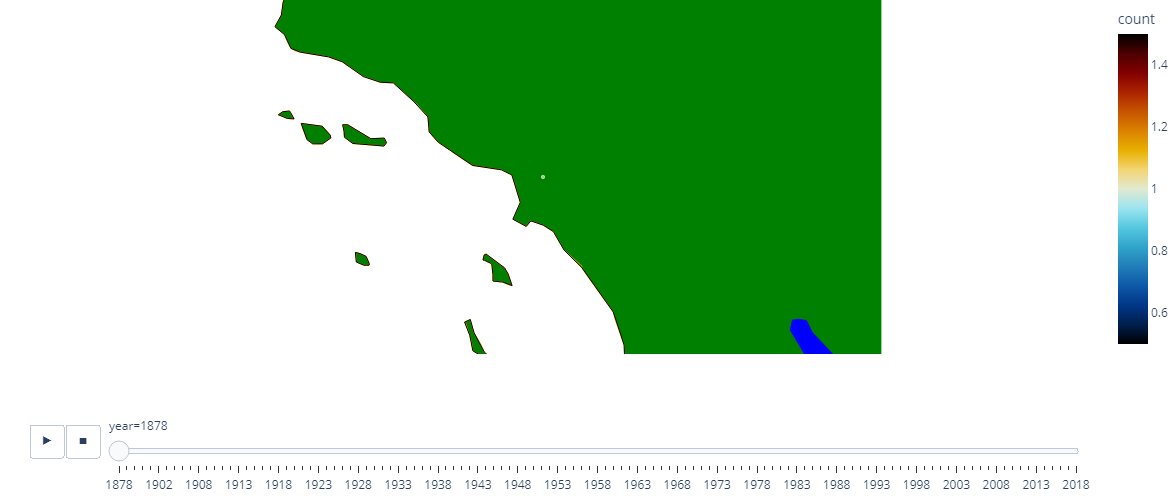

In [119]:
df = pd.read_csv('grouped.csv')
# df_ = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, lat='lat',lon='lon',
                     hover_name="unit", size="count",
                     scope='usa',
                     center={'lat':37.16611, 'lon':-119.44944},
                     # fitbounds='locations',
                     # animation_group="year",
                     animation_frame="year",
                     color_continuous_scale=px.colors.cyclical.IceFire,
                     color='count'
                     )
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="Green",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Orange"
)
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': -73, 'lat': 46 },
        'zoom': 5},
    showlegend = False)

fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

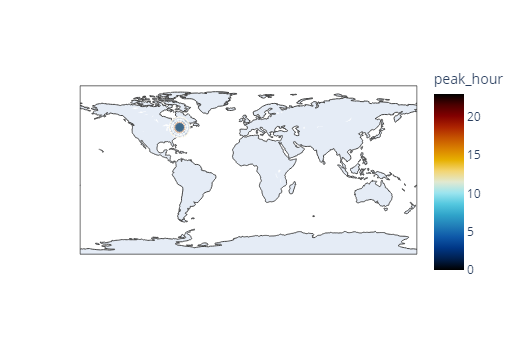

In [116]:
import plotly.express as px
# px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_geo(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15)
fig.show()